## =============Modeling nhóm 7==================

##### MODEL DỰ ĐOÁN LƯỢNG NĂNG LƯỢNG TIÊU THỤ CỦA NĂNG LƯỢNG GIÓ VÀO NHỮNG LOẠI NĂNG LƯỢNG KHÁC

In [1]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### 1. Đọc dữ liệu và vẽ biểu đồ tìm kiếm sự tương quan giữa các cột

In [2]:
#Đọc dataframe
df = pd.read_csv('../Data/data_processed.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (1817, 10)


,Country,Year,Fossil fuels (TWh),Coal (TWh),Oil (TWh),Gas (TWh),Renewables (TWh),Hydropower (TWh),Solar (TWh),Wind (TWh)
0,Algeria,2000,300.0,5.64,103.13,191.01,0.0,0.0,0.0,0.0
1,Argentina,2000,595.0,7.51,264.94,322.97,86.0,84.0,0.0,0.0
2,Australia,2000,1253.0,591.66,455.98,205.55,52.0,49.0,0.0,0.0
3,Austria,2000,262.0,42.47,141.75,78.21,129.0,124.0,0.0,0.0
4,Azerbaijan,2000,128.0,0.00,74.69,52.83,5.0,5.0,0.0,0.0


In [3]:
#Bỏ những cột không cần thiết cho việc huấn luyện model
df = df.drop(['Country', 'Year', 'Fossil fuels (TWh)', 'Renewables (TWh)'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Coal (TWh)        1817 non-null   float64
 1   Oil (TWh)         1817 non-null   float64
 2   Gas (TWh)         1817 non-null   float64
 3   Hydropower (TWh)  1817 non-null   float64
 4   Solar (TWh)       1817 non-null   float64
 5   Wind (TWh)        1817 non-null   float64
dtypes: float64(6)
memory usage: 85.3 KB


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


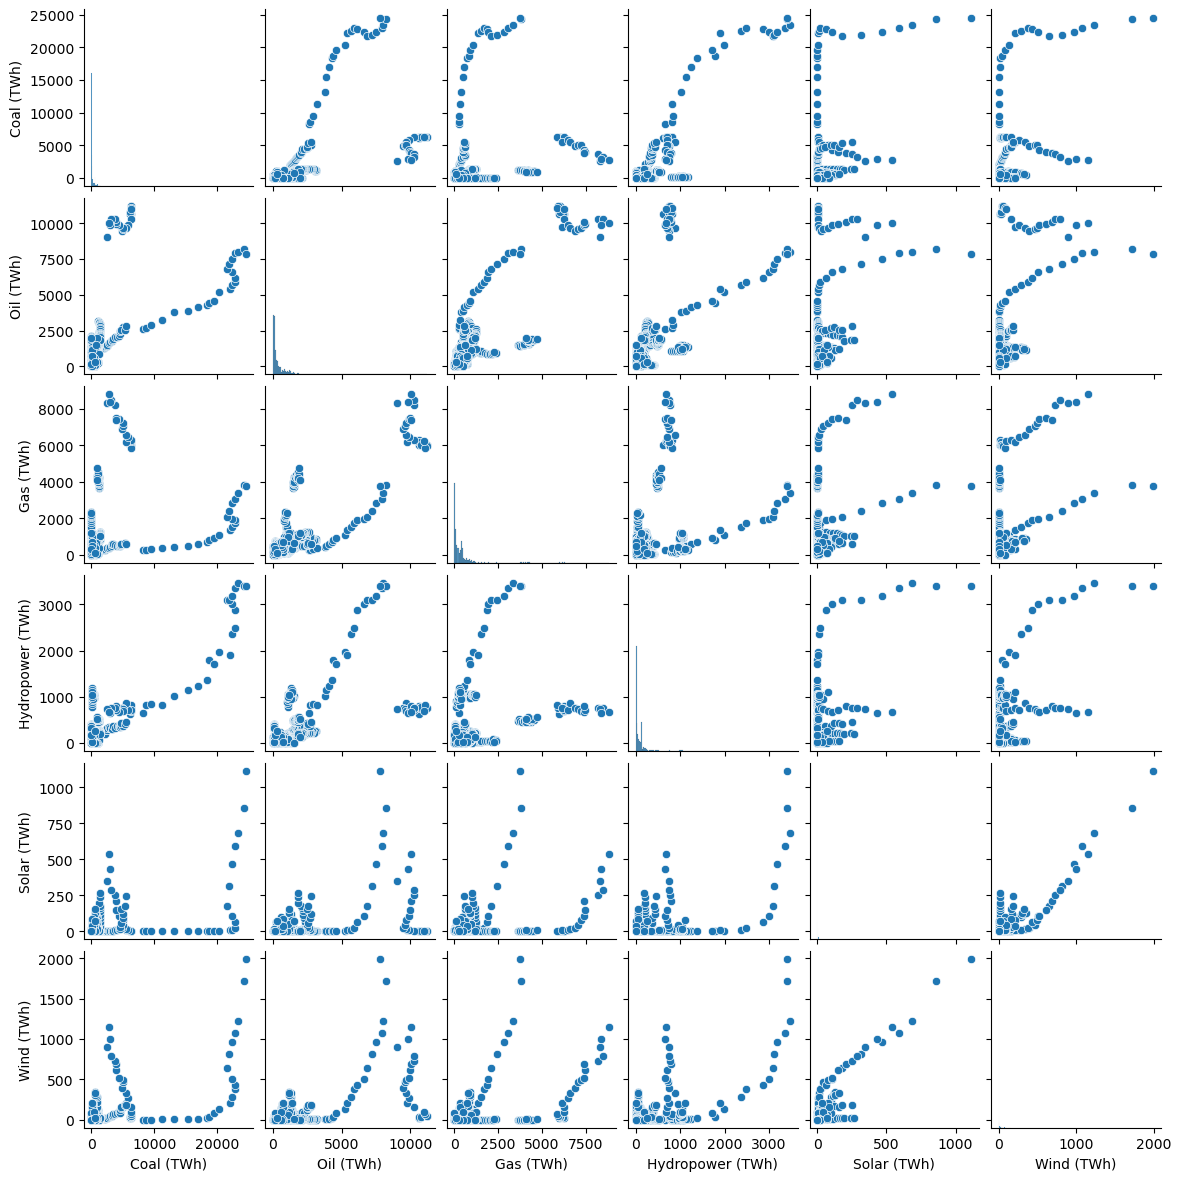

In [4]:
#Vẽ biểu đồ tìm kiếm sự tương quan giữa các cặp trong biểu đồ
sns.pairplot(data = df, height = 2)  

Ma trận tương quan giữa các biến độc lập: 
                   Coal (TWh)  Oil (TWh)  Gas (TWh)  Hydropower (TWh)  \
Coal (TWh)          1.000000   0.649843   0.369401          0.817346   
Oil (TWh)           0.649843   1.000000   0.850148          0.633961   
Gas (TWh)           0.369401   0.850148   1.000000          0.441800   
Hydropower (TWh)    0.817346   0.633961   0.441800          1.000000   
Solar (TWh)         0.542626   0.491895   0.398338          0.553328   
Wind (TWh)          0.628963   0.639290   0.535144          0.650722   

                  Solar (TWh)  Wind (TWh)  
Coal (TWh)           0.542626    0.628963  
Oil (TWh)            0.491895    0.639290  
Gas (TWh)            0.398338    0.535144  
Hydropower (TWh)     0.553328    0.650722  
Solar (TWh)          1.000000    0.909213  
Wind (TWh)           0.909213    1.000000  


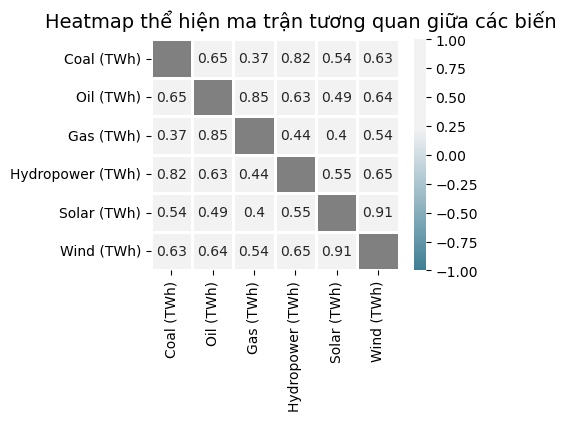

In [5]:
#Vẽ biểu đồ heatmap để thấy được sự tương quan rõ ràng hơn
feature = df.columns
corr = df[feature].corr()  
print('Ma trận tương quan giữa các biến độc lập: \n', corr)  
  
# Tạo một ma trận zeros có cùng kích thước và kiểu dữ liệu như ma trận tương quan corr.  
masking = np.zeros_like(corr, dtype=np.bool_)
# Đặt các phần tử trên đường chéo chính của ma trận masking thành True. Điều này sẽ "che" các ô trên đường chéo vì chúng thường có giá trị 1 (tương quan của một biến với chính nó là 1).
np.fill_diagonal(masking, val = True)  

#  Tạo một subplot với kích thước 4x3 để vẽ biểu đồ heatmap.
figure, axis = plt.subplots(figsize = (4, 3))  
  
# màu sẽ chuyển từ một màu có mã màu 223 đến một màu có mã màu 14.
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
# Đặt màu cho các ô dữ liệu bị thiếu (nếu có) thành màu xám.
c_map.set_bad('grey')  
  
# Vẽ biểu đồ heatmap 
sns.heatmap(corr, annot = True, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap thể hiện ma trận tương quan giữa các biến', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

##### 2. Modeling
    - Lấy bộ dữ liệu để train và test

In [6]:
from sklearn.model_selection import train_test_split
feature_cols = ['Coal (TWh)', 'Oil (TWh)', 'Gas (TWh)', 'Hydropower (TWh)', 'Solar (TWh)']

X = df[feature_cols]
Y = df['Wind (TWh)']

# Tham số test_size là để lấy bộ test chiếm 20% và random_state là trạng thái random không thay đổi tức là qua những lần chạy khác nhau thì bộ dữ liệu tương đồng nhau.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.head()

,Coal (TWh),Oil (TWh),Gas (TWh),Hydropower (TWh),Solar (TWh)
292,106.62,111.21,171.30,38.0,0.0
1417,114.23,882.49,785.49,16.0,30.0
1548,9.07,109.58,45.75,330.0,0.0
300,234.10,885.72,248.29,119.0,0.0
1704,18.39,83.84,38.74,63.0,1.0


    a. Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#Tạo model
lr = LinearRegression()

# Train 
lr.fit(X_train, Y_train)

# Dự đoán kết quả dựa trên tập X_test
Y_pred = lr.predict(X_test)

# Tính MSE
mse = mean_squared_error(Y_test, Y_pred)

# Tính R_square
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)


MSE= 1056.7091568259284 
R_square= 0.9341718936290817
      Y_test     Y_pred
1507     0.0  -2.936657
680      0.0   0.253061
135      0.0  71.610503
408      0.0  -0.551965
591      0.0  -5.487614
...      ...        ...
534      0.0  -5.384441
710      0.0  -1.285479
432      0.0   0.949908
1105     0.0   2.247996
170      2.0  66.456102

[364 rows x 2 columns]


In [9]:
#Tinh chỉnh mô hình LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Tạo bậc huấn luyện bây giờ là 2, không còn là 1 như trước là chỉ có một thuộc tính
#Ví dụ có 3 biến a,b,c thì sẽ tạo ra các phương trình nhiều biến gồm a^2,b^2,c^2, ab,ac,bc. kiểu vậy
degree = 2

# Tạo pipeline để huấn luyện cho mô hình
model = make_pipeline(PolynomialFeatures(degree), lr)

# Train model
model.fit(X_train, Y_train)

# TÍnh dự đoán
Y_pred = model.predict(X_test)

#Tính MSE
mse = mean_squared_error(Y_test, Y_pred)


print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)


MSE= 1481.4654780702313 
R_square= 0.9341718936290817
      Y_test    Y_pred
1507     0.0  1.151693
680      0.0  1.682279
135      0.0  8.429033
408      0.0  3.629633
591      0.0  1.158837
...      ...       ...
534      0.0  1.460361
710      0.0  4.201914
432      0.0  4.585612
1105     0.0  5.644386
170      2.0 -4.687947

[364 rows x 2 columns]


- Sau khi tinh chỉnh thì ta thấy MSE tăng lên cho thấy quá trình tinh chỉnh không hiệu quả hoặc nó bị overfitting chỉ cho kết quả tốt trên tập train và không tốt trên tập test.
- Vì vậy cho thấy ở Model Linear Regression này thì degree=1 vẫn cho kết quả tốt nhất.

b. Decision Tree Regression

In [10]:
#import thư viện
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [11]:
#Tạo model
regressor = DecisionTreeRegressor(random_state= 42)

# Train 
regressor.fit(X_train, Y_train)

# dự đoán trên tập test
Y_pred = regressor.predict(X_test)

# Tính mse
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(Y_test, Y_pred)

print('MSE=',mse,'\nR_square=', r2)

# Tạo DataFrame từ Y_test và Y_pred để dễ so sánh
df_compare = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
print(df_compare)

MSE= 507.4862637362637 
R_square= 0.968385946563238
      Y_test  Y_pred
1507     0.0     0.0
680      0.0     0.0
135      0.0     0.0
408      0.0     0.0
591      0.0     0.0
...      ...     ...
534      0.0     0.0
710      0.0     0.0
432      0.0     0.0
1105     0.0     0.0
170      2.0     2.0

[364 rows x 2 columns]


3. Cross validation

In [12]:
# import thw viện
from sklearn.model_selection import cross_val_score

a. Stratified K-Fold

In [13]:
# import thư viện
from sklearn.model_selection import StratifiedKFold

sk_folds = StratifiedKFold(n_splits = 5)

- Decision Tree Regression

In [14]:
scores = cross_val_score(regressor, X, Y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores:  [0.92050434 0.91218929 0.95453136 0.94940891 0.75308812]
Average CV Score:  0.8979444038978313
Number of CV Scores used in Average:  5


- Linear Regression

In [15]:
scores = cross_val_score(lr, X, Y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.7768161  0.89110341 0.86138227 0.89553237 0.8542978 ]
Average CV Score:  0.8558263894085586
Number of CV Scores used in Average:  5


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


b. Shuffle Split

In [16]:
# import thư viện
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(train_size=0.7, test_size=0.2, n_splits = 5)

- Decision Tree Regression

In [17]:
scores = cross_val_score(regressor, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.92488868 0.90831202 0.91260679 0.75660849 0.9288219 ]
Average CV Score:  0.8862475756635352
Number of CV Scores used in Average:  5


- Linear Regression

In [18]:
scores = cross_val_score(lr, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.89802704 0.81471593 0.95804653 0.8392471  0.90550766]
Average CV Score:  0.8831088524537014
Number of CV Scores used in Average:  5
